# Health Insurance Analysis Across America (Part 2)
## PSTAT 134 Final Project 


>Authors: Michael Hanson, Maya Samet, Alex Yam

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install plotly
import plotly.plotly as py
import warnings
warnings.simplefilter('ignore')
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.graphics.gofplots as sms

View previous notebook for EDA and introduction!

## Creation of Linear Models

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that we have finished the EDA, we can take the results from our visualization, fit them to linear models and try to find any signicance in our predictors. For these models, our response will be the variable for out-of-pocket premium cost to try and find which variables actually contribute to higher premium costs. Also keeping in line with the previous examples, we will be transforming our response to taking the cube root of it. First things first, we look at just a simple linear regression with variables we have already looked at.

In [33]:
health_pruned = health[health.HICOSTR1 < 90000]
health_pruned = health_pruned[health_pruned.AGE_P > 17]
health_pruned = health_pruned[health_pruned.INCGRP4 < 6]
health_pruned = health_pruned.drop(health_pruned.columns[0], axis=1)
health_pruned = health_pruned.drop(['RECTYPE.x', 'RECTYPE.y'], axis=1)
fit1 = ols("np.power(HICOSTR1, (1/3)) ~ AGE_P+C(RACERPI2)+C(LA1AR)+C(INCGRP4)", data = health_pruned, missing = 'drop').fit()
#Removed region, transform the response by the cube root.
print(fit1.summary())
print('ANOVA Table of Relevant Variables')
print(anova_lm(fit1))

                                 OLS Regression Results                                
Dep. Variable:     np.power(HICOSTR1, (1 / 3))   R-squared:                       0.076
Model:                                     OLS   Adj. R-squared:                  0.072
Method:                          Least Squares   F-statistic:                     20.03
Date:                         Fri, 14 Jun 2019   Prob (F-statistic):           2.29e-39
Time:                                 03:57:36   Log-Likelihood:                -7855.2
No. Observations:                         2692   AIC:                         1.573e+04
Df Residuals:                             2680   BIC:                         1.581e+04
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From our results in the summary, we are able to create a model in which we can use to predict possible premium costs. We have an intercept value of 13.0553 and coefficient values of our variables for age, race, ability to work, and income bracket. We can also see from our regression results that we have an R-squared value of 0.076. This indicates that roughly 7.6% of variation in premium cost can be explained by our regression model. As we can see in the probability column of the summary, the income bracket yields a p-value of 0.024 which implies that the effects of income on premium cost is statistically significant for a 0.05 significance level. The other variables are considered not statistically significant at a 0.05 significance level and thus have an insignificant effect on the premium cost.

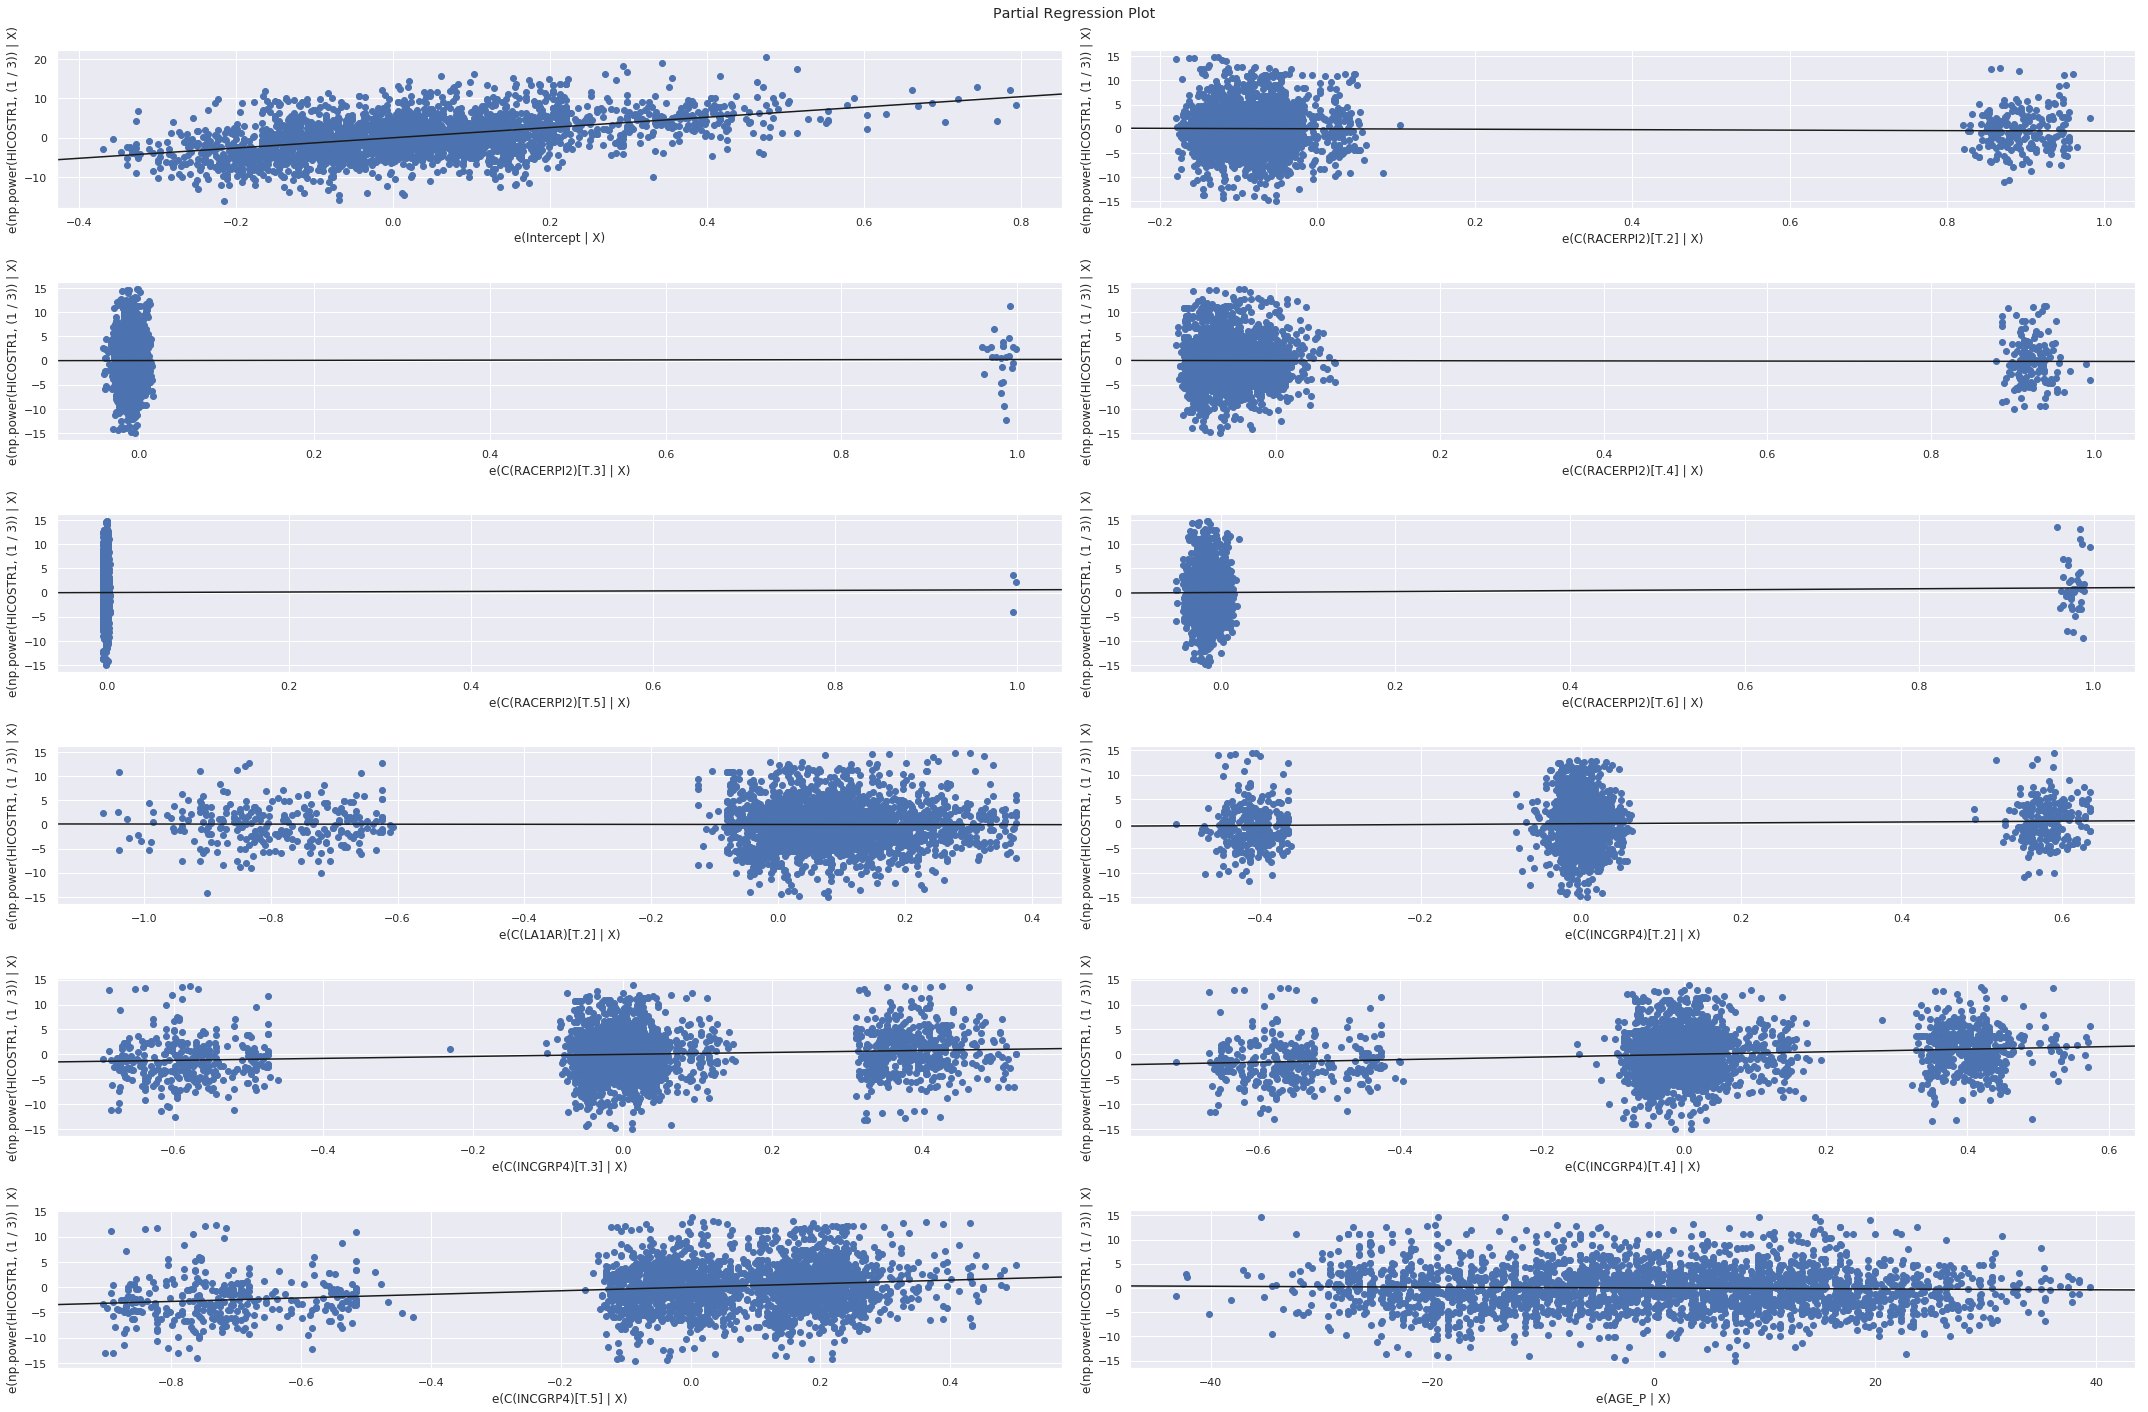

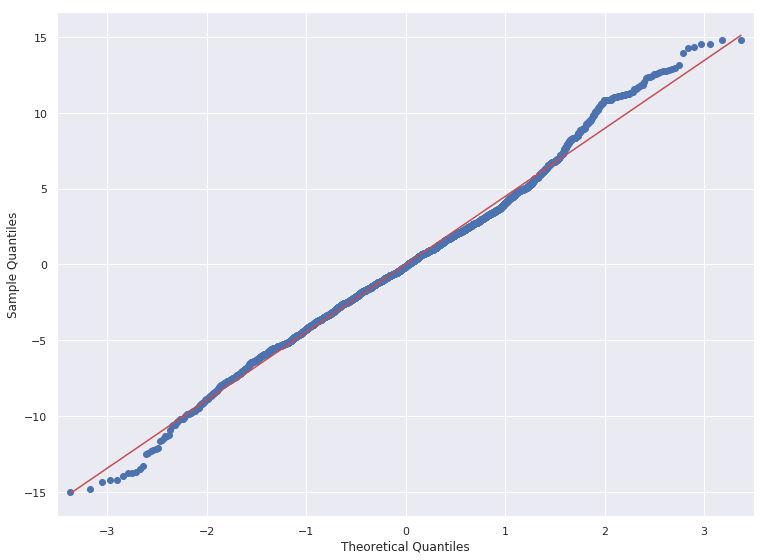

In [34]:
fig = plt.figure(figsize=(30,20))
fig = sm.graphics.plot_partregress_grid(fit1, fig=fig)
resid = fit1.resid
sms.qqplot(resid, line = 's');

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From this, we have a general idea of the significant and insignificant variables in our model, however we do not know for sure. To narrow it down even more, we can run a LASSO regression with the variables from the ANOVA table along with a new variable 'medical_status' which indicates whether or not the individual suffers from any physical disability, mental disability, physical illness, or mental illness.

C(RACERPI2)[T.2]         -0.463142
C(RACERPI2)[T.3]          0.000000
C(RACERPI2)[T.4]          0.000000
C(RACERPI2)[T.5]          0.000000
C(RACERPI2)[T.6]          0.757950
C(LA1AR)[T.2]             0.000000
C(INCGRP4)[T.2]           0.000000
C(INCGRP4)[T.3]           1.544877
C(INCGRP4)[T.4]           2.162013
C(INCGRP4)[T.5]           3.084247
C(REGION)[T.2]           -0.028673
C(REGION)[T.3]            0.000000
C(REGION)[T.4]           -0.277089
C(medical_status)[T.1]    0.000000
C(medical_status)[T.2]    0.000000
C(medical_status)[T.3]    0.000000
C(medical_status)[T.4]    0.000000
AGE_P                    -0.010014
dtype: float64


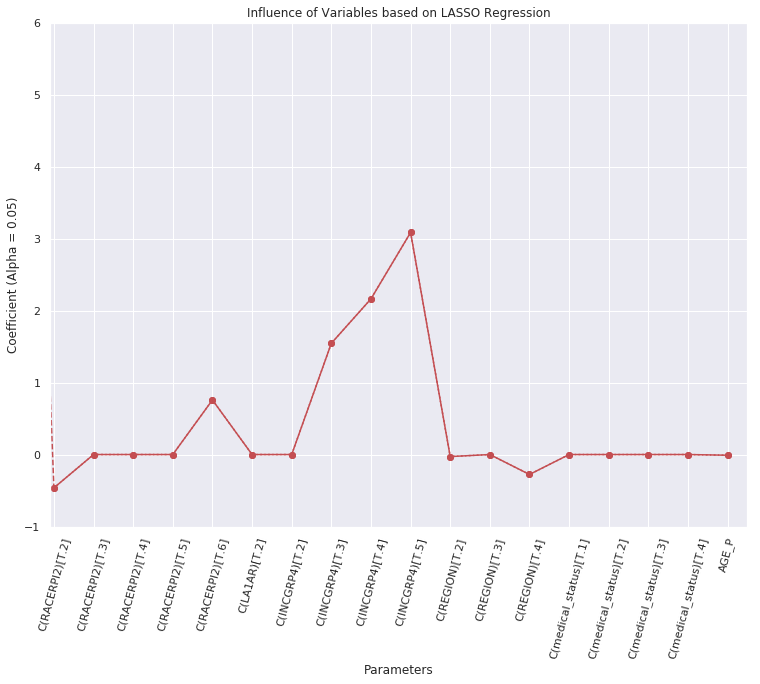

In [35]:
condition_target = [((health_pruned['LAHCC1'] == 1) | (health_pruned['LAHCC2'] == 1) | (health_pruned['LAHCC3']==1) | (health_pruned['LAHCC4']==1) | (health_pruned['LAHCC5']==1) | (health_pruned['LAHCC6']==1) | (health_pruned['LAHCC10']==1) | (health_pruned['LAHCC11']==1) | (health_pruned['LAHCA1']==1) | (health_pruned['LAHCA2']==1) | (health_pruned['LAHCA3']==1) | (health_pruned['LAHCA4']==1) | (health_pruned['LAHCA5']==1) | (health_pruned['LAHCA6']==1) | (health_pruned['LAHCA13']==1) | (health_pruned['LAHCA18']==1) | (health_pruned['LAHCA19_']==1) | (health_pruned['LAHCA20_']==1) | (health_pruned['LAHCA31_']==1) | (health_pruned['LAHCA34_']==1)),
                   ((health_pruned.LAHCC7A==1) | (health_pruned.LAHCC8==1) | (health_pruned.LAHCC9==1) | (health_pruned.LAHCC12==1) | (health_pruned.LAHCC13==1) | (health_pruned.LAHCA14A==1) | (health_pruned.LAHCA15 == 1) | (health_pruned.LAHCA16==1) | (health_pruned.LAHCA32_==1) | (health_pruned.LAHCA33_==1)),
                   ((health_pruned.LAHCA7==1) | (health_pruned.LAHCA8==1) | (health_pruned.LAHCA9==1) | (health_pruned.LAHCA10==1) | (health_pruned.LAHCA11==1) | (health_pruned.LAHCA12==1) | (health_pruned.LAHCA22_==1) | (health_pruned.LAHCA23_==1) | (health_pruned.LAHCA24_==1) | (health_pruned.LAHCA25_==1) | (health_pruned.LAHCA26_==1) | (health_pruned.LAHCA27_==1) | (health_pruned.LAHCA28_==1)),
                   ((health_pruned.LAHCA17==1) | (health_pruned.LAHCA30_==1))]
choices_target = [1,2,3,4]

health_pruned['medical_status'] = np.select(condition_target, choices_target, default=0)
fit2 = ols(formula = 'np.power(HICOSTR1, (1/3))~AGE_P+C(RACERPI2)+C(LA1AR)+C(INCGRP4)+C(REGION)+C(medical_status)', data=health_pruned, missing='drop').fit_regularized(method='elastic_net', alpha = 0.005, L1_wt=1)
print(fit2.params[1:])
plt.plot(fit2.params, 'o--r');
plt.xticks(rotation = 75);
plt.plot(fit2.params[1:], 'o--r');
plt.xticks(rotation = 75);
plt.xlim([0.9,18.5]);
plt.ylim([-1,6]);
plt.ylabel('Coefficient (Alpha = 0.05)');
plt.xlabel('Parameters');
plt.title('Influence of Variables based on LASSO Regression');

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As with the simple linear regression before, we can see that the most significant variable in determining premium cost is income bracket. This result is however, not surprising as it would follow that the more money you make the more you would be willing to get more expensive health insurance plans which leads to higher out-of-pocket premium cost. We can now make a formuala that we can use to predict the average premium cost for people that follow certain characteristics. Below, we predict the average cost for a person over the age of 55 who lives on the West coast and makes 70,000 dollars a year to get 2,821.64. 

In [36]:
#Final Formula
fit_final = ols('np.power(HICOSTR1, (1/3))~AGE_P+C(RACERPI2)+C(INCGRP4)+C(REGION)', data=health_pruned, missing='drop').fit()
prediction = fit_final.predict(health_pruned[['AGE_P','REGION','RACERPI2', 'INCGRP4']])
health_pruned['PREDICTION'] = prediction
#Predictions, just change the paramemters to get the average of people with selected characteristics.
print(np.power(health_pruned.PREDICTION[(health_pruned.REGION == 4) & (health_pruned.AGE_P > 55) & (health_pruned.INCGRP4 ==3)].mean(), (3)))

2821.640697155838


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After all of our analysis of premium cost, we can confidently determine that the most significant predictor is the income bracket that the individual falls into. We also found relations to the kind of disability or illness an individual has and how much they pay for their premium. However, with the number of variables that we have in this data set, there could be many different and unexpected variables that could affect premium cost more than income bracket, however that seems unlikely.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For future analysis, the size of this data set can send us on numerous different directions. We only looked at premium cost in this report but there are more that seven hundred different variable that we can ask a ton of different questions about. One direct we could have gone towards was doing a complete analysis on just physical and mental disabilities about common characteristics among those individuals. We see a lot of potential to do much with this data set in the future.